In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric, \
    plot_binned_metric_vs_mean_metric, plot_two_metrics_by_ephoc, plot_two_metrics_with_mean, \
    plot_two_metrics_with_mean_multi_ep, plot_two_metrics_by_ephoc, plot_two_ann_metrics_train_test, \
    plot_two_ann_metrics_begining_end, plot_mean_r2_bars, plot_hist_of_performances_by_ephoc
import joblib
from itertools import combinations

COLORS = ['#4F6272',  '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]


In [2]:
results_path = "/Volumes/noamaz/modularity/retina_xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina_xor"
num_layers = '3'
dim1, dim2 = [3, 4]
dims = [6, 3, 4, 2]

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/retina_multi_archs/retina_{num_layers}_layers_{dim1}_{dim2}"
res_dir = f"{results_path}/retina_{num_layers}_layers_{dim1}_{dim2}/ergm_results/6_features"
res_folders = [
    '2023-09-11-14-09-34_J9_P0',
    '2023-09-11-15-49-34_J80_P1',
    '2023-09-11-16-37-02_J7_P2',
    '2023-09-11-16-42-08_J8_P3',
    '2023-09-12-10-54-55_J7_P4'
]

In [3]:
all_first_analsis = []
for folder in res_folders:
    for file_name in sorted(os.listdir(f"{res_dir}/{folder}/first_analysis_results")):
        if 'no_duplicates' not in file_name:
            continue
        ep = int(file_name.split('ep')[0].split('_')[-2])
        if ep == 6000:
            first_analsis = pd.read_csv(f"{res_dir}/{folder}/first_analysis_results/{file_name}")
            all_first_analsis.append(first_analsis.rename(
                columns={'connectivity_ratio': 'density',
                         }).sort_values('mean_performance', ascending=False)
                                     )

In [4]:
points = [
    [
        2.14968926, 10, 10.03, 10, 10, 91
    ],
    [
        1.96172632, 7, 7, 7, 7, 20,
    ],
    [
        2.0351528, 8, 9.98, 8.02, 8, 28,
    ],
    [
        2.09960146, 6, 6, 7.98, 9, 41,
    ],
    [
        2.09491389, 10, 10, 9, 10, 56,
    ]
]

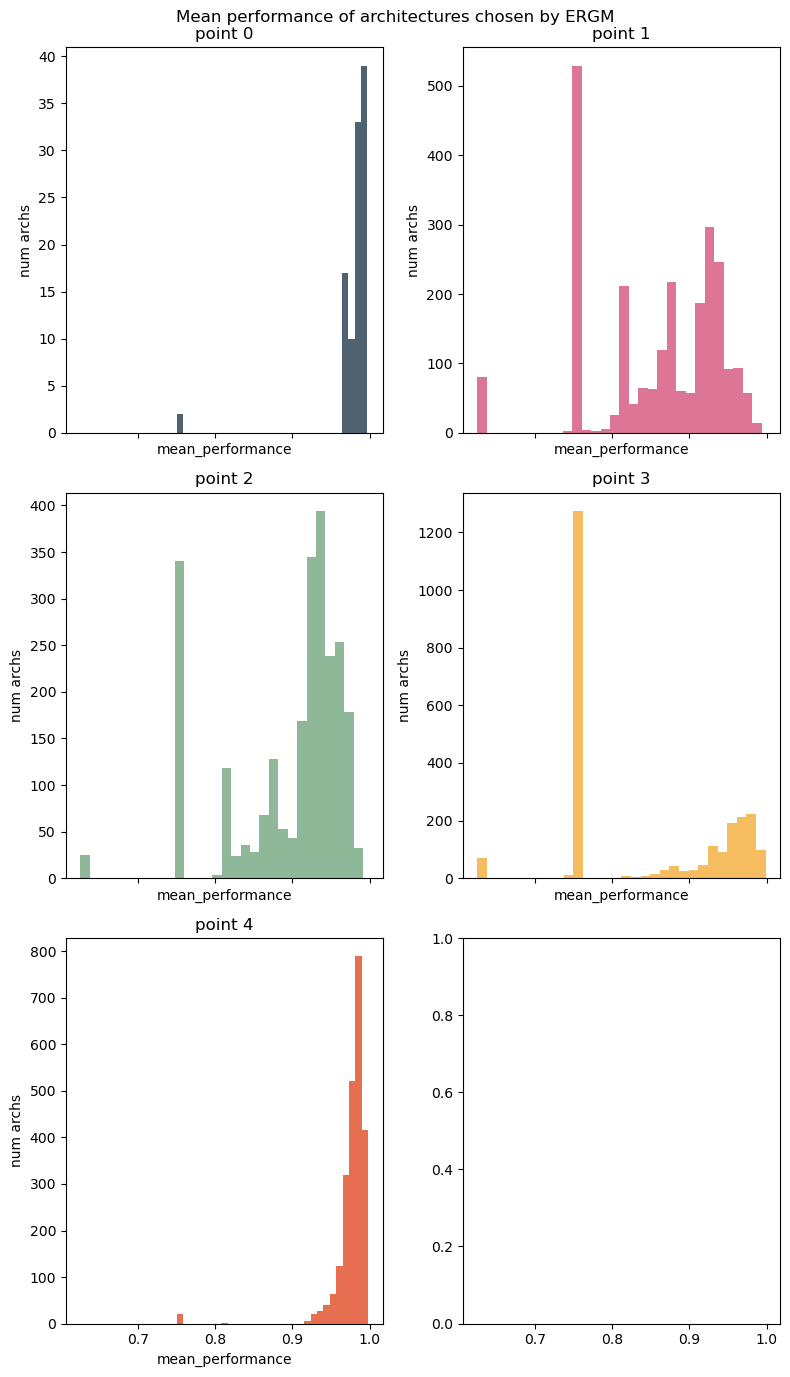

In [7]:

num_columns = int(np.ceil(len(res_folders) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(8, 14), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (first_analsis, exp_name, p, (i, j)) in enumerate(zip(all_first_analsis, res_folders, points, idxs)):
    axs[i, j].hist(first_analsis['mean_performance'], color=COLORS[k], bins=30)
    axs[i, j].set_title(f"point {k}")
    axs[i, j].set_xlabel(f"mean_performance")
    axs[i, j].set_ylabel(f"num archs")
plt.suptitle('Mean performance of architectures chosen by ERGM')
plt.tight_layout()



In [ ]:
pd.